# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución
El objetivo de este paso es cargar los datos, obtener una visión general de su estructura y contenido, e identificar problemas iniciales como valores ausentes o tipos de datos incorrectos.

1. Carga de Datos: Se cargarán los archivos CSV proporcionados.
2. Para cada DataFrame cargado se realizarán las siguientes verificaciones:
* df.info(): Para obtener un resumen conciso del DataFrame, incluyendo el número de entradas, el conteo de valores no nulos por columna y el tipo de dato (Dtype) de cada columna.
* df.head(): Para visualizar las primeras filas del DataFrame y tener una idea del formato y contenido de los datos.
3. Verificación de Valores Ausentes: Se utilizará df.isnull().sum() para identificar y cuantificar los valores ausentes. Este paso es crucial para entender la completitud de los datos y planificar futuras estrategias de imputación o manejo de datos faltantes.

In [ ]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [ ]:
# mostrar información del DataFrame
df_instacart_orders.info()
# mostrar primeras filas
df_instacart_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
# mostrar información del DataFrame
df_products.info()
# mostrar primeras filas
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
# mostrar información del DataFrame
df_order_products.info()
# mostrar primeras filas
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [ ]:
# mostrar información del DataFrame
df_aisles.info()
# mostrar primeras filas
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
# mostrar información del DataFrame
df_departments.info()
# mostrar primeras filas
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

* Carga y Formato de Archivos: Se confirmó que los archivos CSV utilizan un punto y coma (;). Esta situación fue corregida especificando el parámetro sep=';' para asegurar una lectura correcta de la información.

* Integridad de los Datos: la mayoría de las columnas en todos los DataFrames se cargaron sin valores nulos. Sin embargo, se identificó un problema específico en la columna add_to_cart_order del DataFrame df_order_products, la cual presenta 836 valores ausentes (NaN).

Impacto y Próximos Pasos: La presencia de estos valores ausentes, es un hallazgo crítico. Para análisis futuros, se requerirá una estrategia de manejo de estos NaN.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada.

</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
1. Transformación de Tipo de Datos de order_id: Se convertirá el tipo de dato de la columna order_id en el DataFrame df_order_products de float64 a int64 mediante el método .astype(int).
2. Manejo de Valores Ausentes en add_to_cart_order: Se imputarán los valores ausentes (NaN) en la columna add_to_cart_order del DataFrame df_order_products. Se utilizará el método .fillna() para reemplazar los NaN con un valor numérico específico. Posteriormente, se convertirá la columna add_to_cart_order a tipo int64 mediante .astype(int), dado que ahora todos sus valores son numéricos y enteros.
3. Revisión de Datos duplicados (df_instacart_orders): Se revisarán los DataFrames en busca de filas duplicadas utilizando el método .duplicated().sum().
Se examinarán las filas duplicadas (si existen) con df[df.duplicated(keep=False)] para entender su naturaleza y decidir la estrategia de manejo.
4. Verificación Final de Tipos de Datos y Valores Ausentes: Se realizará una verificación final de los tipos de datos con .info() y la ausencia de nulos con .isnull().sum() para confirmar que las transformaciones se aplicaron correctamente y que los DataFrames están listos para el análisis.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print (df_instacart_orders.duplicated().sum())

df_instacart_orders[df_instacart_orders.duplicated(keep= False)]

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


Las filas duplicadas son del dia miercoles a las 2

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
pedidos_miercoles_2am

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Es altamente probable que sea el resultado de un fallo sistémico o un error en la recopilación de datos en un momento particular. Por lo tanto, el resultado sugiere fuertemente que estas filas duplicadas deben ser eliminadas del DataFrame df_instacart_orders antes de continuar con cualquier análisis.

In [ ]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()


In [ ]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_instacart_orders['order_id'].duplicated().sum()

0

Para asegurar la integridad y fiabilidad de los análisis subsiguientes, las filas duplicadas fueron eliminadas del DataFrame df_instacart_orders. Conservar estos registros redundantes habría distorsionado métricas clave como el conteo total de órdenes, la frecuencia de pedidos y otros patrones de comportamiento del cliente, comprometiendo la validez de los resultados.

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay ID de productos duplicados
df_products['product_id'].duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products['product_name'].duplicated().sum())
df_products[df_products['product_name'].duplicated(keep= False)]

1361


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,BIOTIN 1000 MCG,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products['product_id'].duplicated().sum()

0

Aunque no hay duplicados de IDs de producto ni filas completamente duplicadas, existe un número considerable de product_name duplicados, muchos de los cuales son NaN y están agrupados en un pasillo y departamento específico. Los duplicados restantes de product_name pueden ser variaciones del mismo producto o productos distintos con nombres coincidentes.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_departments['department_id'].duplicated().sum()

0

No hay departamentos duplicados.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_aisles['aisle_id'].duplicated().sum()

0

No hay pasillos duplicados.

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Duplicados exactos en todas las columnas (que no deberían existir si cada fila es un artículo único)
exact_duplicates = df_order_products[df_order_products.duplicated(keep=False)]
print(exact_duplicates)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


No hay duplicados exactos en las filas del dataframe

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo al identificar y eliminar los datos duplicados. Esto ayuda a evitar sesgos, mejora la calidad del análisis y hace que los modelos sean más precisos. Además, trabajar con datos limpios facilita la interpretación y el uso eficiente de los recursos.

</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products[df_products['product_name'].isnull()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


La razón más probable para estos datos ausentes puede ser una combinación de errores en la recopilación o entrada de datos o que son productos que existieron pero que por alguna razón ya no tienen un nombre asociado en el registro actual.

Es importante abordar estos valores ausentes, ya sea eliminando las filas, imputando los valores.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[df_products['aisle_id'] == 100]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Todos los 1258 valores ausentes estan relacionados con el pasillo 100

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[df_products['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Todos los 1258 valores ausentes estan relacionados con el departamento 21

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_departments[df_departments['department_id'] == 21])
print(df_aisles[df_aisles['aisle_id'] == 100])


    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Los 1258 productos sin nombre no son un error de recopilacion. Este hallazgo sugiere que estan clasificados a propósito con el "departamento 21" y el "pasillo 100", que en las tablas de referencia aparecen como "missing". Es una forma de organizarlos.

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products.isnull().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Se cambia el nombre a "unknown" ya que es importante mantener los productos a pesar de no tener su nombre.

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
df_instacart_orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_orders.loc[
    df_instacart_orders['days_since_prior_order'].isnull() &
    (df_instacart_orders['order_number'] != 1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


No hay valores ausentes que no sean el primer pedido del cliente

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
df_order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_add_to_cart = df_order_products['add_to_cart_order'].min()
max_add_to_cart = df_order_products['add_to_cart_order'].max()

print(f"El valor mínimo en 'add_to_cart_order' es: {min_add_to_cart}")
print(f"El valor máximo en 'add_to_cart_order' es: {max_add_to_cart}")

El valor mínimo en 'add_to_cart_order' es: 1.0
El valor máximo en 'add_to_cart_order' es: 64.0


Por pedido minimamente se agrega 1 producto, y maximo 64.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id']
pedidos_ausentes

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_order_products[df_order_products['order_id'].isin(pedidos_ausentes)]
print(df_order_products[df_order_products['order_id'].isin(pedidos_ausentes)]['add_to_cart_order'].max())
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_order_products[df_order_products['order_id'].isin(pedidos_ausentes)].groupby('order_id').size()
print(df_order_products[df_order_products['order_id'].isin(pedidos_ausentes)].groupby('order_id').size())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_order_products[df_order_products['order_id'].isin(pedidos_ausentes)].groupby('order_id').size().min()

64.0
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64


65

Todos los pedidos con valores ausentes tienen mas de 64 productos. Podría haber una limitación en el campo add_to_cart_order que no permite valores superiores a 64. Si el máximo add_to_cart_order es 64, cualquier producto que sea el 65º o posterior en ser añadido al carrito podría tener un valor ausente porque excede el rango permitido para esa columna.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Esta podría ser una solución práctica a corto plazo para manejar los datos ausentes, pero no es una solución óptima y no aborda la causa raíz del problema.

## Conclusiones

Preprocesamiento de los datos.

Las acciones de preprocesamiento aplicadas han resuelto consistentemente los problemas de calidad de datos identificados. Los DataFrames ahora están limpios, con tipos de datos correctos y sin duplicados o valores ausentes problemáticos, lo que permite la realización de análisis exploratorios y la extracción de conocimientos de forma fiable y precisa.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
#Verifica que los valores en la columna 'order_hour_of_day' oscile entre 0 y 23
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].max())


0
23


In [ ]:
#Verifica que los valores en la columna 'order_dow' oscile entre 0 y 6
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].max())

0
6


Verificamos que las columnas de hora y dia son razonables y que oscilan entre 0-23 horas y de domingo-sabado.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:>

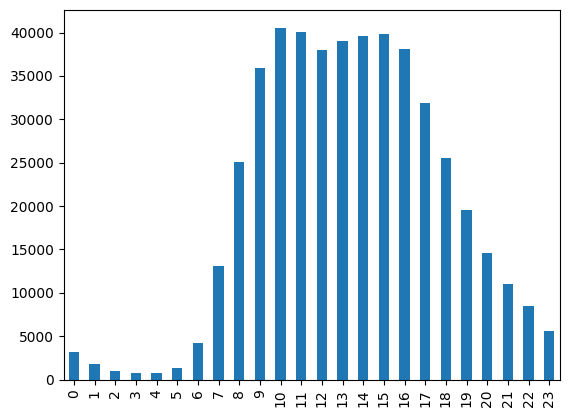

In [ ]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
df_instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')


Las personas hacen más pedidos marcadamente durante el dia, disminuye considerabemente durante la noche. Siendo las 9:00 am la hora en que mas se realizaron pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:>

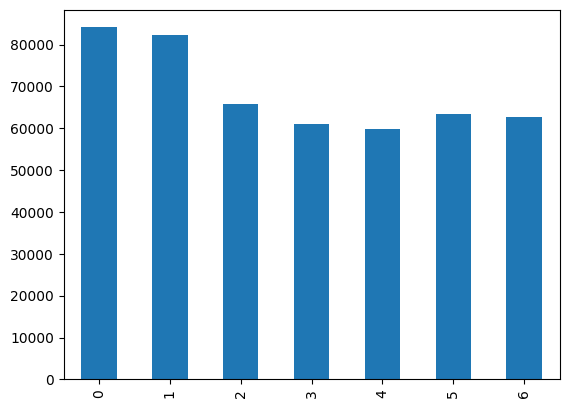

In [ ]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras
df_instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar')

El dia domingo es cuando se hacen mayor numero de compras, superando al dia sabado por muy poco.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:>

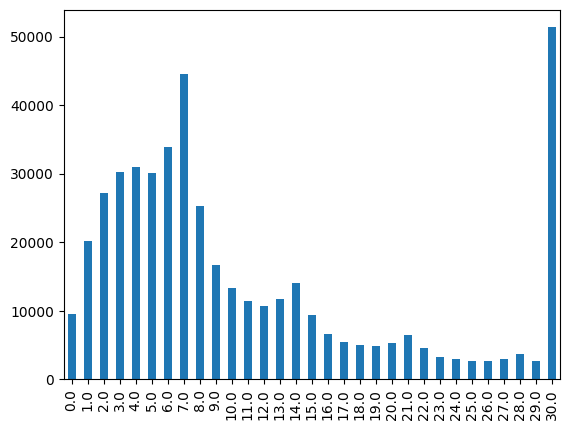

In [ ]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.
df_instacart_orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar')

La mayoria de las personas vuelve a hacer su compra al mes (cada 30 dias) o semanalmente (cada 7 dias).

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
#Distribucion de 'order_hour_of_day' de los miércoles
distribucion_miercoles = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()


In [ ]:
#Distribucion de 'order_hour_of_day' de los sábados
distribucion_sabado = df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()


In [ ]:
# Crear un DataFrame combinando ambas Series
df_plot = pd.DataFrame({
    'Miércoles': distribucion_miercoles,
    'Sábado': distribucion_sabado
})
print("Comparación de la distribución de pedidos por hora:")
print(df_plot)

Comparación de la distribución de pedidos por hora:
    Miércoles  Sábado
0         373     464
1         215     254
2         106     177
3         101     125
4         108     118
5         170     161
6         643     451
7        1732    1619
8        3125    3246
9        4490    4311
10       5026    4919
11       5004    5116
12       4688    5132
13       4674    5323
14       4774    5375
15       5163    5188
16       4976    5029
17       4175    4295
18       3463    3338
19       2652    2610
20       1917    1847
21       1450    1473
22       1154    1185
23        718     893


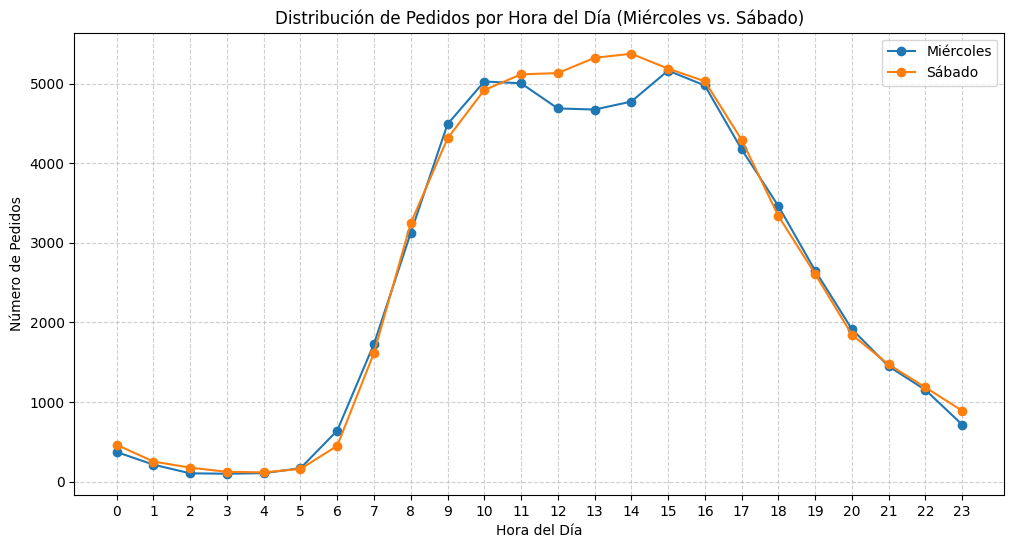

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['Miércoles'], marker='o', label='Miércoles')
plt.plot(df_plot.index, df_plot['Sábado'], marker='o', label='Sábado')

plt.title('Distribución de Pedidos por Hora del Día (Miércoles vs. Sábado)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24)) # Asegura que todas las horas de 0 a 23 se muestren en el eje X
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Ambos dias muestran un patron diurno similar, en forma de campana durante el dia, y descenso marcado por la noche, pero hay algunas diferencias entre ambos dias.



*   Miércoles: El pico de pedidos parece situarse alrededor de las 10 AM - 11 AM, con un ligero descenso y un posible segundo pico o una meseta entre las 13:00 y las 15:00 horas, antes de comenzar un descenso más pronunciado.
*   Sábado: El sábado muestra un pico más claro y pronunciado más tarde en el día, alrededor de las 13 PM - 14 PM, alcanzando un volumen de pedidos ligeramente superior al pico de los miércoles.



### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
# Numero máximo de pedidos por cada usuario
num_pedidos_por_cliente = df_instacart_orders.groupby('user_id')['order_number'].max()
#Distribucion del numero de pedidos por cliente
distribucion_pedidos_cliente = num_pedidos_por_cliente.value_counts().sort_index()
print("Distribución del número de pedidos por cliente:")
print(distribucion_pedidos_cliente)


Distribución del número de pedidos por cliente:
1       7840
2       9113
3      10510
4      12368
5      10406
       ...  
96       133
97       173
98       148
99       143
100      194
Name: order_number, Length: 100, dtype: int64


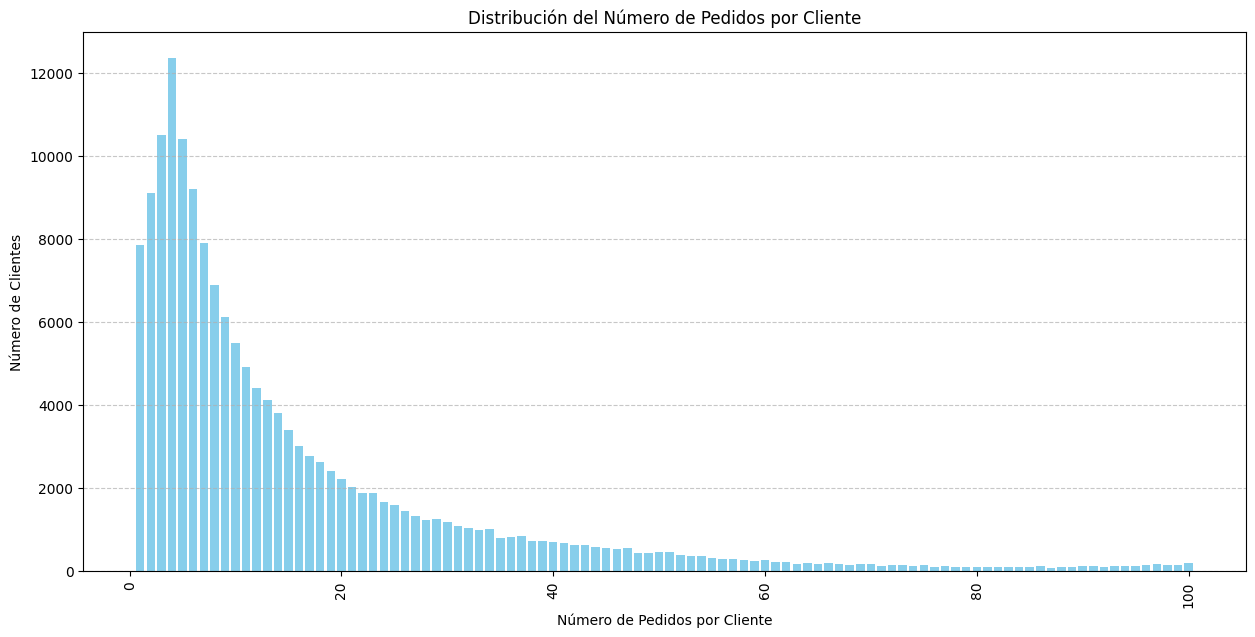

In [ ]:
#Visualizacion en una gráfica
plt.figure(figsize=(15, 7))

# plt.bar para crear un gráfico de barras
plt.bar(distribucion_pedidos_cliente.index, distribucion_pedidos_cliente.values, color='skyblue')

plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La gran mayoría de los clientes en el dataset han realizado un número relativamente pequeño de pedidos.
Hay progresivamente menos clientes que han realizado un número muy alto de pedidos, pero aunque son pocos en número, existen clientes extremadamente leales y frecuentes que han realizado una gran cantidad de pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
#Contar la popularidad de cada producto
product_popularity = df_order_products['product_id'].value_counts()

In [ ]:
#Convertir la Serie a DataFrame para facilitar la unión
product_popularity_df = product_popularity.reset_index()
product_popularity_df.columns = ['product_id', 'order_count']

In [ ]:
#Unir con df_products para obtener los nombres de los productos
popular_products_with_names = pd.merge(
    product_popularity_df,
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)

#Ordenar por el conteo de pedidos de forma descendente y seleccionar los top 20
top_20_popular_products = popular_products_with_names.sort_values(by='order_count', ascending=False).head(20)

print("Los 20 productos más populares:")
# Seleccionamos solo las columnas 'product_id' y 'product_name' como se solicitó
print(top_20_popular_products[['product_id', 'product_name', 'order_count']])

Los 20 productos más populares:
    product_id              product_name  order_count
0        24852                    BANANA        66050
1        13176    BAG OF ORGANIC BANANAS        53297
2        21137      ORGANIC STRAWBERRIES        37039
3        21903      ORGANIC BABY SPINACH        33971
4        47209      ORGANIC HASS AVOCADO        29773
5        47766           ORGANIC AVOCADO        24689
6        47626               LARGE LEMON        21495
7        16797              STRAWBERRIES        20018
8        26209                     LIMES        19690
9        27845        ORGANIC WHOLE MILK        19600
10       27966       ORGANIC RASPBERRIES        19197
11       22935      ORGANIC YELLOW ONION        15898
12       24964            ORGANIC GARLIC        15292
13       45007          ORGANIC ZUCCHINI        14584
14       39275       ORGANIC BLUEBERRIES        13879
15       49683            CUCUMBER KIRBY        13675
16       28204        ORGANIC FUJI APPLE        12

La lista de los 20 productos más populares en Instacart está compuesta principalmente por frutas y vegetales. Se observa una clara preferencia por las variantes orgánicas dentro de estas categorías.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
# Contar el número de artículos por cada pedido
articulos_por_pedido = df_order_products.groupby('order_id').size()
# Calcular estadísticas descriptivas
print("Estadísticas descriptivas del número de artículos por pedido:")
print(articulos_por_pedido.describe())


Estadísticas descriptivas del número de artículos por pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


In [ ]:
# Obtener la distribución
distribucion_articulos_por_pedido = articulos_por_pedido.value_counts().sort_index()

print(distribucion_articulos_por_pedido.head(15)) # Muestra los primeros 15 valores (los más comunes)
print("...")
print(distribucion_articulos_por_pedido.tail(15)) # Muestra los últimos 5 valores (pedidos muy grandes)

1     21847
2     26292
3     29046
4     31054
5     31923
6     31698
7     30822
8     28539
9     25742
10    23248
11    20406
12    18539
13    16497
14    14472
15    12696
dtype: int64
...
76     2
77     2
78     2
80     1
85     1
86     3
87     1
91     2
92     2
95     2
98     1
104    1
108    1
115    1
127    1
dtype: int64


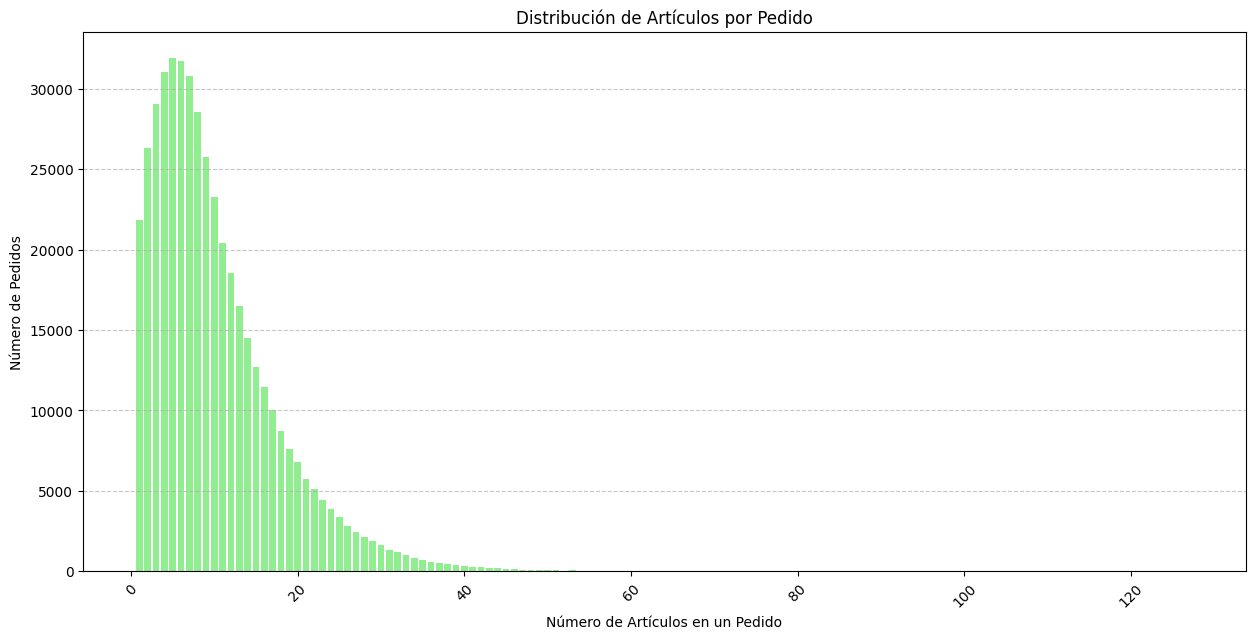

In [ ]:
#Visualizar la distribución
plt.figure(figsize=(15, 7))

plt.bar(distribucion_articulos_por_pedido.index, distribucion_articulos_por_pedido.values, color='lightgreen')

plt.title('Distribución de Artículos por Pedido')
plt.xlabel('Número de Artículos en un Pedido')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La media o promedio de artículos por pedido es de aproximadamente 10.1 artículos.
Hay muchos pedidos pequeños (hasta 8-14 artículos), pero también existen algunos pedidos considerablemente grandes (hasta 127 artículos) que influyen en el promedio. La mayoría de los pedidos son relativamente pequeños.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
# Filtrar el DataFrame para incluir solo los productos que fueron reordenados
reordered_products = df_order_products[df_order_products['reordered'] == 1]

# Contar la frecuencia de cada product_id en los productos reordenados
reorder_counts = reordered_products['product_id'].value_counts()

# Convertir la Serie a DataFrame y nombrar las columnas
reorder_counts_df = reorder_counts.reset_index()
reorder_counts_df.columns = ['product_id', 'reorder_count']

In [ ]:
# Unir con df_products para obtener los nombres de los productos
top_reordered_products_with_names = pd.merge(
    reorder_counts_df,
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)
print(top_reordered_products_with_names.head(20))

# Ordenar por el conteo de reordenamientos de forma descendente y seleccionar los top 20
top_20_reordered = top_reordered_products_with_names.sort_values(by='reorder_count', ascending=False).head(20)

    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16        8277           8836  APPLE HONEYCRISP 

La gran similitud entre los 20 productos más pedidos y los 20 productos más reordenados sugiere que los productos más populares en Instacart son también los productos que los clientes compran de forma recurrente como parte de sus compras habituales.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#Calcular el conteo total de pedidos por cada producto
total_orders_per_product = df_order_products.groupby('product_id').size().reset_index(name='total_orders')

#Calcular el conteo de reordenamientos por cada producto
reorders_per_product = df_order_products[df_order_products['reordered'] == 1] \
                            .groupby('product_id').size().reset_index(name='reorder_count')

In [ ]:
#Unir ambos conteos en un solo DataFrame
#si un producto nunca fue reordenado, su 'reorder_count' será NaN.
product_reorder_data = pd.merge(
    total_orders_per_product,
    reorders_per_product,
    on='product_id',
    how='left'
)
#Rellenar los NaN en 'reorder_count' con 0 (para productos que nunca se reordenaron)
product_reorder_data['reorder_count'] = product_reorder_data['reorder_count'].fillna(0).astype(int)

In [ ]:
#Calcular la proporción de reordenamiento
product_reorder_data['reorder_proportion'] = product_reorder_data['reorder_count'] / product_reorder_data['total_orders']

#Unir con df_products para obtener los nombres de los productos
product_reorder_proportion_with_names = pd.merge(
    product_reorder_data,
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)

print("Productos con su proporción de reordenamiento:")
# Ordenar por la proporción de reordenamiento de forma descendente para ver los más reordenados
print(product_reorder_proportion_with_names.sort_values(by='reorder_proportion', ascending=False).head(20))


Productos con su proporción de reordenamiento:
       product_id  total_orders  reorder_count  reorder_proportion  \
13453       14721             1              1                 1.0   
19195       20949             3              3                 1.0   
6136         6723            10             10                 1.0   
6144         6732             3              3                 1.0   
41319       45088             1              1                 1.0   
41310       45078             1              1                 1.0   
19258       21016             1              1                 1.0   
19248       21005             2              2                 1.0   
32273       35192             2              2                 1.0   
32277       35197             1              1                 1.0   
6211         6810             1              1                 1.0   
41274       45040             2              2                 1.0   
41269       45035            17            

Creo que faltaría filtrarlos y reordenarlos en cuales tienen un mayor volumen de pedidos para que sea significativa la proporcion de reordenamiento y estrategicamente importante.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
#Combinar df_order_products con df_instacart_orders
df_combined = pd.merge(
    df_order_products,
    df_instacart_orders[['order_id', 'user_id']],
    on='order_id',
    how='inner'
)

# Agrupar por 'user_id'
# Sumar el total de 'reordered' para obtener el conteo de ítems reordenados por cliente.
# Contar el número total de ítems pedidos por cada cliente.
user_reorder_summary = df_combined.groupby('user_id')['reordered'].agg(
    total_items_reordered='sum',
    total_items_ordered='count'
).reset_index()

#Calcular la proporción de reordenamiento por cliente
user_reorder_summary['reorder_proportion_per_user'] = user_reorder_summary['total_items_reordered'] / user_reorder_summary['total_items_ordered']

# Mostrar las estadísticas descriptivas de esta proporción a nivel de usuario
print("Estadísticas descriptivas de la proporción de reordenamiento por cliente:")
print(user_reorder_summary['reorder_proportion_per_user'].describe())

# Mostrar los primeros clientes y su proporción de reordenamiento
print("\nPrimeros 10 clientes con su proporción de reordenamiento:")
print(user_reorder_summary.head(10))


Estadísticas descriptivas de la proporción de reordenamiento por cliente:
count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: reorder_proportion_per_user, dtype: float64

Primeros 10 clientes con su proporción de reordenamiento:
   user_id  total_items_reordered  total_items_ordered  \
0        2                      1                   26   
1        4                      0                    2   
2        5                      8                   12   
3        6                      0                    4   
4        7                     13                   14   
5       11                      3                   15   
6       12                      3                   12   
7       13                     13                   23   
8       14                     22                   61   
9       15                      7                   1

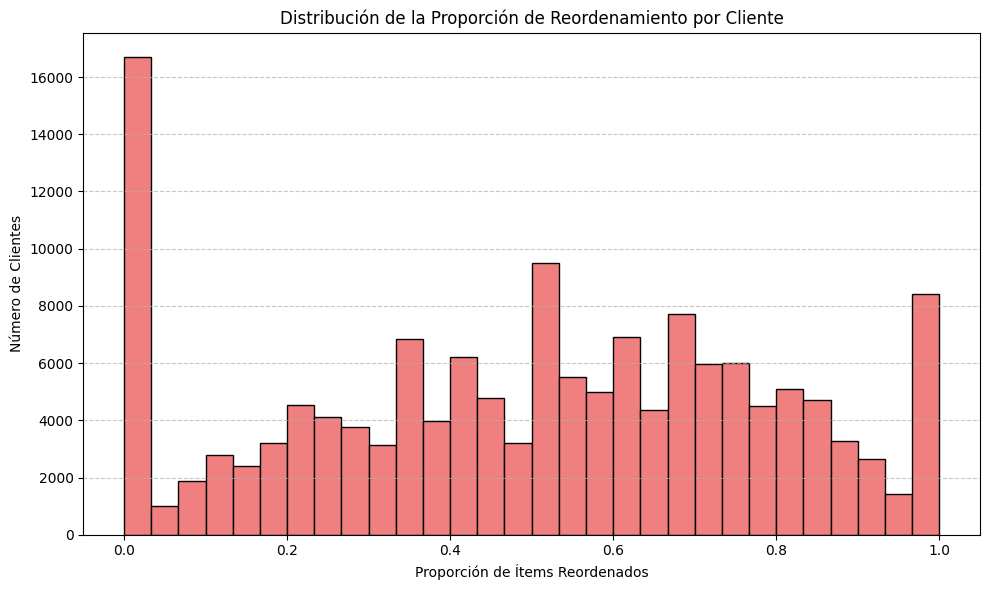

In [ ]:
#Visualizar la distribución de la proporción de reordenamiento por cliente
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(user_reorder_summary['reorder_proportion_per_user'], bins=30, edgecolor='black', color='lightcoral')
plt.title('Distribución de la Proporción de Reordenamiento por Cliente')
plt.xlabel('Proporción de Ítems Reordenados')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico de distribución de la proporción de reordenamiento por cliente nos revela que Instacart tiene una base de clientes polarizada:
* Clientes "nuevos/ocasional": Aquellos con baja proporción de reordenamiento.
* Clientes "leales/básicos": Aquellos con alta proporción de reordenamiento.
* Clientes "intermedios": Aquellos que podrían ser influenciados para aumentar su reordenamiento.

Entender estos segmentos es fundamental para el diseño de estrategias comerciales.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#Filtrar el DataFrame para incluir solo los productos que fueron añadidos primero al carrito
# Ignoramos los valores NaN en 'add_to_cart_order' para este análisis, ya que representan un problema en el registro, no que el producto no fuera el primero.
first_in_cart_products = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar la frecuencia de cada product_id en esta selección
first_in_cart_counts = first_in_cart_products['product_id'].value_counts()

# Convertir la Serie a DataFrame y nombrar las columnas
first_in_cart_df = first_in_cart_counts.reset_index()
first_in_cart_df.columns = ['product_id', 'first_in_cart_count']



In [ ]:
# Unir con df_products para obtener los nombres de los productos
top_first_in_cart_with_names = pd.merge(
    first_in_cart_df,
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)

#Ordenar por el conteo de 'primeros en carrito' de forma descendente y seleccionar los top 20
top_20_first_in_cart = top_first_in_cart_with_names.sort_values(by='first_in_cart_count', ascending=False).head(20)

print("Los 20 principales artículos que las personas ponen primero en sus carritos:")
# Mostrar las columnas product_id, product_name y first_in_cart_count
print(top_20_first_in_cart[['product_id', 'product_name', 'first_in_cart_count']])

Los 20 principales artículos que las personas ponen primero en sus carritos:
    product_id                 product_name  first_in_cart_count
0        24852                       BANANA                15562
1        13176       BAG OF ORGANIC BANANAS                11026
2        27845           ORGANIC WHOLE MILK                 4363
3        21137         ORGANIC STRAWBERRIES                 3946
4        47209         ORGANIC HASS AVOCADO                 3390
5        21903         ORGANIC BABY SPINACH                 3336
6        47766              ORGANIC AVOCADO                 3044
7        19660                 SPRING WATER                 2336
8        16797                 STRAWBERRIES                 2308
9        27966          ORGANIC RASPBERRIES                 2024
10       44632   SPARKLING WATER GRAPEFRUIT                 1914
11       49235          ORGANIC HALF & HALF                 1797
12       47626                  LARGE LEMON                 1737
13         19

Los productos que los clientes suelen añadir primero a sus carritos son, en gran medida, los mismos productos frescos y básicos que dominan las listas de popularidad y reordenamiento.
La presencia de Spring Water, Sparkling Water Grapefruit, Soda y Organic Half & Half en esta lista de "primeros artículos" también es notable, sugiriendo que las bebidas y algunos lácteos son a menudo el punto de partida

### Conclusion general del proyecto:

Conclusiones Estratégicas del Análisis de Datos de Instacart

Este análisis ofrece una visión clara del comportamiento de compra y la popularidad de los productos.

1. Calidad de Datos Mejorada, Confiabilidad Asegurada:
* Problema: Identificamos y eliminamos órdenes duplicadas. Un patrón inusual (miércoles a las 2 a.m.) sugiere un error técnico en el sistema de registro.
* Acción: La eliminación de estos duplicados garantiza que nuestras métricas de órdenes y ventas sean precisas, evitando sobreestimaciones.
* Impacto para el Negocio: Decisiones basadas en datos limpios, lo que conduce a una asignación de recursos más eficiente y evaluaciones de rendimiento realistas.

2. Entendiendo el Comportamiento de Recompra:
* Hallazgo: La "Banana", "Bag of Organic Bananas" y "Organic Strawberries" son consistentemente los productos más vendidos y, crucialmente, los más reordenados.
* Hallazgo: Un número significativo de productos tienen una tasa de reordenamiento del 100%, lo que indica una alta lealtad o necesidad recurrente para esos ítems específicos, aunque esto puede ser en un volumen bajo de pedidos.
* Sugerencia:
* Gestión de Inventario: Asegurar una disponibilidad constante y niveles de stock óptimos para los productos de alta recompra.
* Promociones Dirigidas: Considerar ofertas para estos productos populares para incentivar compras más grandes o frecuentes, o para utilizarlos como "gancho" para ventas cruzadas.
* Experiencia del Usuario: Facilitar la reordenación rápida de estos productos en la aplicación o sitio web, ya que son esenciales para la recurrencia del cliente.

3. Identificando Productos "Primeros en Carrito":
* Hallazgo: La "Banana", "Bag of Organic Bananas" y "Organic Milk" son también los artículos que los clientes añaden con mayor frecuencia como primer producto a su carrito.
* Sugerencia:
* Diseño de la Interfaz: Colocar estos productos destacados en la página de inicio o en recomendaciones visibles para agilizar el proceso de compra.
* Marketing en la Aplicación: Utilizar estos productos como base para sugerencias personalizadas, ya que marcan el inicio de una sesión de compra.

4. Comportamiento del Cliente y Frecuencia de Pedidos:
* Hallazgo: La mayoría de los clientes realizan un número relativamente bajo de pedidos (entre 1 y 5), pero hay una cola larga de clientes que hacen muchos pedidos (hasta 100).
* Sugerencia:
* Estrategias de Retención: Desarrollar programas de lealtad o incentivos para motivar a los clientes de baja frecuencia a realizar más pedidos.
* Segmentación de Clientes: Implementar estrategias diferenciadas para clientes de alta y baja frecuencia, reconociendo las distintas necesidades y patrones de compra.

5. Oportunidad con Datos Faltantes:
* Problema: Un grupo significativo de productos (1,258) tenían nombres ausentes y estaban clasificados en un "pasillo 100" y "departamento 21" que no existen en las categorías conocidas.
* Sugerencia: Investigar la causa de estos datos "desconocidos". Podrían ser categorías nuevas, productos descontinuados, o un error en la carga de datos. Resolver esto podría revelar nuevos segmentos de productos o la necesidad de ajustar las categorías actuales.

En resumen, el análisis ha proporcionado una base de datos robusta y ha revelado patrones claros en el comportamiento de compra. Las sugerencias se centran en capitalizar la popularidad de ciertos productos, optimizar la experiencia de usuario y refinar la gestión del catálogo para impulsar el crecimiento y la eficiencia operativa.